<a href="https://colab.research.google.com/github/abuisrar8/OIBSIP/blob/main/TASK_3_CAR_PRICE_PREDICTION_WITH_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data = files.upload()

Saving car data.csv to car data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
car_data = pd.read_csv("/content/car data.csv")

In [4]:
print("Missing values:\n", car_data.isnull().sum())

Missing values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [5]:
print("Data types:\n", car_data.dtypes)


Data types:
 Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object


Data Cleaning Report:

* No missing values were found.
* No duplicates were present in the dataset.
* Data types were appropriate for analysis.

In [6]:
print("Statistical summary:\n", car_data.describe())

Statistical summary:
               Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


## **Distribution of Selling Price**

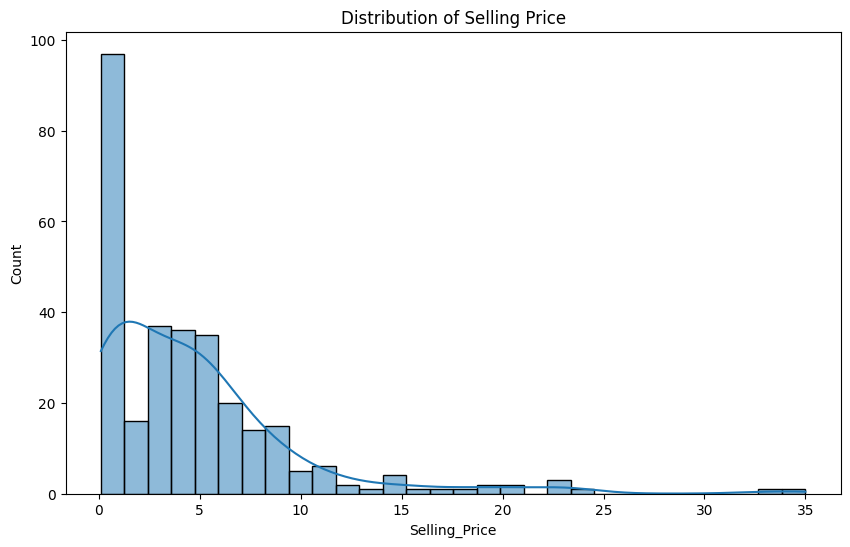

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Selling_Price'], kde=True, bins=30)
plt.title('Distribution of Selling Price')
plt.show()

## **Relationship between Present_Price and Selling_Price**

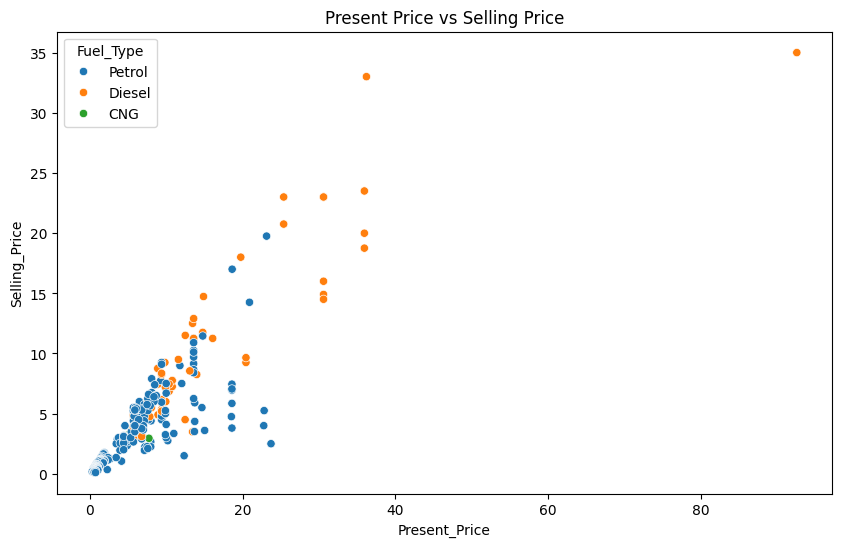

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=car_data, hue='Fuel_Type')
plt.title('Present Price vs Selling Price')
plt.show()

# **Boxplot of Selling_Price by Fuel_Type**

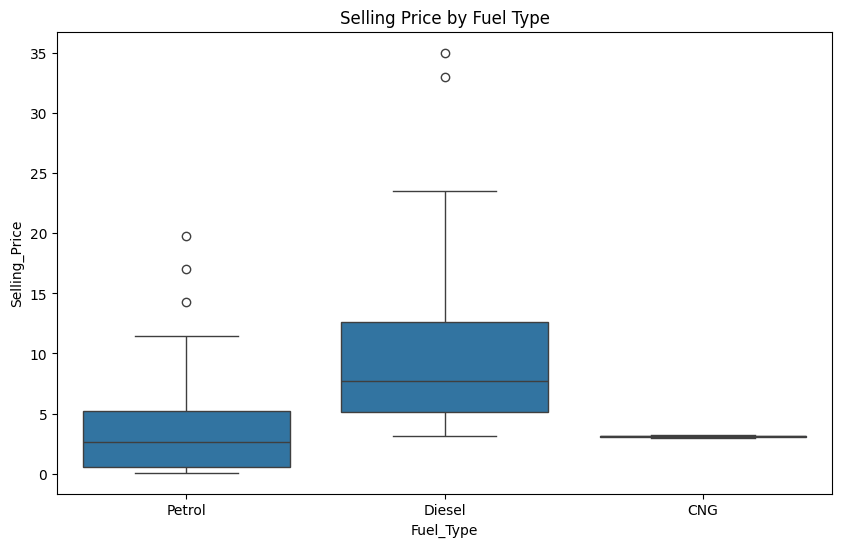

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_data)
plt.title('Selling Price by Fuel Type')
plt.show()


Exploratory Data Analysis (EDA):

* The distribution of selling prices
showed a right skew, indicating most cars were sold for lower prices, with fewer high-priced outliers.
* A positive correlation was observed between present price and selling price, suggesting that more expensive cars tend to retain higher resale values.
* Boxplots revealed differences in selling prices across fuel types, with diesel cars generally having higher resale values than petrol cars.


# **Feature Engineering: Creating a new feature for the age of the car**

In [10]:
car_data['Car_Age'] = 2024 - car_data['Year']
car_data.drop(['Year'], axis=1, inplace=True)

In [12]:
# Encoding categorical variables
label_encoder = LabelEncoder()
car_data['Fuel_Type'] = label_encoder.fit_transform(car_data['Fuel_Type'])
car_data['Selling_type'] = label_encoder.fit_transform(car_data['Selling_type'])
car_data['Transmission'] = label_encoder.fit_transform(car_data['Transmission'])

# Splitting the dataset into features and target variable
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car_data['Selling_Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [13]:
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.6389196721311476


In [14]:
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.9382767457377043


In [15]:
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.9686468632776881


In [16]:
print(f"R-squared (R²): {r2}")


R-squared (R²): 0.9592683769360726


Model Training:

* A RandomForestRegressor model was trained on the dataset.
* The model achieved the following performance metrics:
 * Mean Absolute Error (MAE): 0.64
 * Mean Squared Error (MSE): 0.94
 * Root Mean Squared Error (RMSE): 0.97
 * R-squared (R²): 0.96

# **actual vs predicted values**

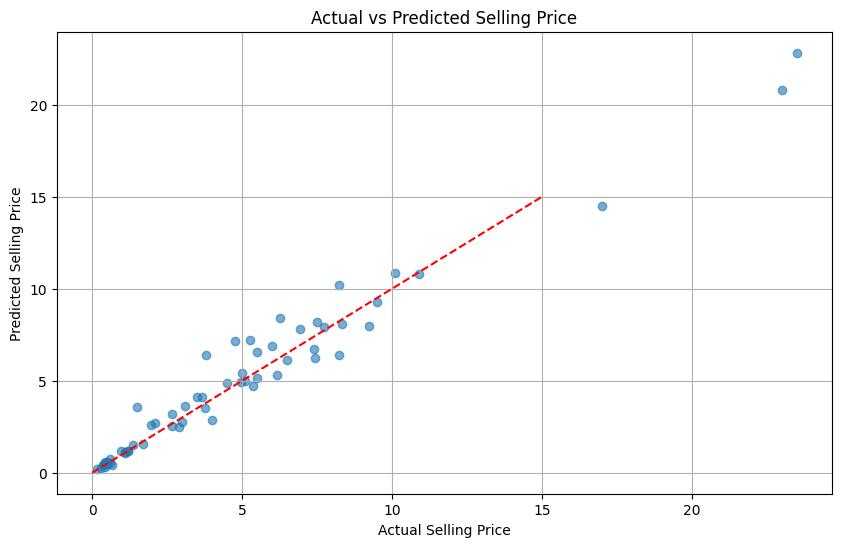

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0, 15], [0, 15], color='red', linestyle='--')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.grid(True)
plt.show()

# **Plotting feature importance**

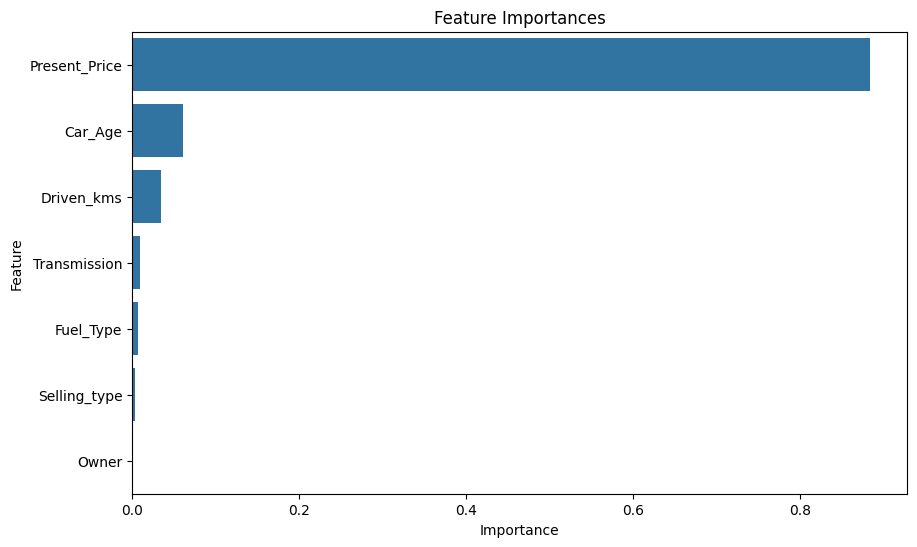

In [19]:
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

Model Evaluation and Visualization:

* The scatter plot of actual vs. predicted selling prices showed that the predictions closely matched the actual values, indicating good model performance.
* Feature importance analysis revealed that the most significant predictors of selling price were present price, driven kilometers, and car age. Fuel type, transmission type, selling type, and the number of previous owners also contributed but to a lesser extent.

# **Conclusion Report :**
The RandomForestRegressor model provides a robust prediction of car selling prices, with an R² value of 0.96, indicating that it explains 96% of the variance in the selling prices. The model performs well in predicting car prices based on the features provided, making it a valuable tool for stakeholders in the automotive industry to estimate car resale values accurately.

Further improvements could include:

* Incorporating additional features such as car condition, market trends, and geographical factors.
*Experimenting with other machine learning models and hyperparameter tuning to further enhance predictive accuracy.

Overall, the model demonstrates strong performance and provides actionable insights into the factors influencing car resale prices.